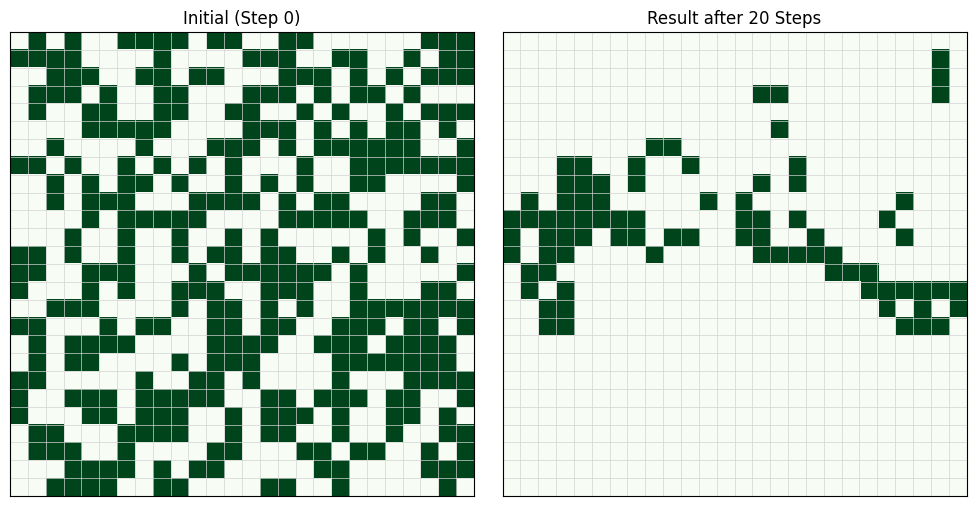

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_grid(size=26):
    return np.random.randint(0, 2, size=(size, size))

def count_neighbors(grid, x, y):
    rows, cols = grid.shape
    count = 0
    for i in range(max(0, x - 1), min(rows, x + 2)):
        for j in range(max(0, y - 1), min(cols, y + 2)):
            count += grid[i, j]
    count -= grid[x, y]
    return count

def update_grid(grid):
    rows, cols = grid.shape
    new_grid = grid.copy()
    for i in range(rows):
        for j in range(cols):
            neighbors = count_neighbors(grid, i, j)
            if grid[i, j] == 1:
                if neighbors < 2 or neighbors > 3:
                    new_grid[i, j] = 0
            else:
                if neighbors == 3:
                    new_grid[i, j] = 1
    return new_grid

# Execution
matrix = initialize_grid(26)
initial_matrix = matrix.copy()

for _ in range(20):
    matrix = update_grid(matrix)

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Initial
ax[0].imshow(initial_matrix, cmap='Greens', vmin=0, vmax=1)
ax[0].set_title("Initial (Step 0)")
ax[0].grid(which='both', color='lightgrey', linestyle='-', linewidth=0.5)
ax[0].set_xticks(np.arange(-.5, 26, 1)); ax[0].set_yticks(np.arange(-.5, 26, 1))
ax[0].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

# Final
ax[1].imshow(matrix, cmap='Greens', vmin=0, vmax=1)
ax[1].set_title("Result after 20 Steps")
ax[1].grid(which='both', color='lightgrey', linestyle='-', linewidth=0.5)
ax[1].set_xticks(np.arange(-.5, 26, 1)); ax[1].set_yticks(np.arange(-.5, 26, 1))
ax[1].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

plt.tight_layout()
plt.show()